In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
train = pd.read_csv('train.csv') 
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train[train['Age']>32]   

In [3]:
test = pd.read_csv('test.csv')
test.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info() 

In [ ]:
test.info() 

In [4]:
todos = pd.concat([train, test], sort = False) 

In [ ]:
todos.head() 

In [ ]:
todos.info() 

In [5]:
todos['Age'] = todos['Age'].fillna(value = todos['Age'].median())
todos['Fare'] = todos['Fare'].fillna(value = todos['Age'].median())

In [ ]:
todos.info() 

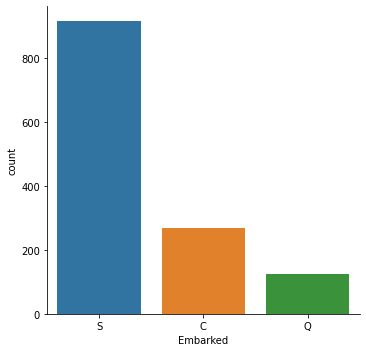

In [36]:
sns.catplot(x = 'Embarked',kind = 'count', data = todos) 

In [6]:
todos['Embarked'] = todos['Embarked'].fillna('S') 
todos.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
todos['Cabin'] 

In [7]:
todos['Cabin'] = todos['Cabin'].fillna('Perdido')
todos['Cabin'] = todos['Cabin'].str[0]

In [ ]:
todos['Cabin'].head() 

In [ ]:
todos.info() 

## Codificación de variables categóricas 

### Dividir en grupos de edad

In [8]:
todos['Age'] = todos['Age'].astype(int) 

In [ ]:
todos.info() 

In [9]:
todos.loc[(todos['Age'] <= 16),'Age'] = 0
todos.loc[(todos['Age'] > 16) & (todos['Age'] <= 32),'Age']  = 1
todos.loc[(todos['Age'] > 32) & (todos['Age'] <= 48),'Age'] = 2
todos.loc[(todos['Age'] > 48) & (todos['Age'] <= 64),'Age'] = 3
todos.loc[(todos['Age'] > 64),'Age'] = 4

In [10]:
todos.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,1.291826,0.498854,0.385027,33.291434
std,378.020061,0.486592,0.837836,0.795881,1.041658,0.865560,51.739086
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,1.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,2.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,4.000000,8.000000,9.000000,512.329200


In [11]:
todos_1 = todos.drop(['Name', 'Ticket'], axis = 1)

In [12]:
todos_1['tamano_familia'] = todos_1['SibSp'] + todos_1['Parch'] + 1
todos_1['esta_solo'] = 0
todos_1.loc[(todos_1['tamano_familia'] == 1),'esta_solo'] = 1


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,tamano_familia,esta_solo
0,1,0.0,3,male,1,1,0,7.2500,P,S,2,0
1,2,1.0,1,female,2,1,0,71.2833,C,C,2,0
2,3,1.0,3,female,1,0,0,7.9250,P,S,1,1
3,4,1.0,1,female,2,1,0,53.1000,C,S,2,0
4,5,0.0,3,male,2,0,0,8.0500,P,S,1,1


In [14]:
todos_1 = todos_1.drop(['SibSp', 'Parch'],axis = 1)
todos_1.head() 

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,tamano_familia,esta_solo
0,1,0.0,3,male,1,7.2500,P,S,2,0
1,2,1.0,1,female,2,71.2833,C,C,2,0
2,3,1.0,3,female,1,7.9250,P,S,1,1
3,4,1.0,1,female,2,53.1000,C,S,2,0
4,5,0.0,3,male,2,8.0500,P,S,1,1


In [15]:
todos_dummies = pd.get_dummies(todos_1)
todos_dummies.head() 

,PassengerId,Survived,Pclass,Age,Fare,tamano_familia,esta_solo,Sex_female,Sex_male,Cabin_A,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_P,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,7.2500,2,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,2,1.0,1,2,71.2833,2,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1.0,3,1,7.9250,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,1.0,1,2,53.1000,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0.0,3,2,8.0500,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [16]:
todos_dummies.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
PassengerId       1309 non-null int64
Survived          891 non-null float64
Pclass            1309 non-null int64
Age               1309 non-null int32
Fare              1309 non-null float64
tamano_familia    1309 non-null int64
esta_solo         1309 non-null int64
Sex_female        1309 non-null uint8
Sex_male          1309 non-null uint8
Cabin_A           1309 non-null uint8
Cabin_B           1309 non-null uint8
Cabin_C           1309 non-null uint8
Cabin_D           1309 non-null uint8
Cabin_E           1309 non-null uint8
Cabin_F           1309 non-null uint8
Cabin_G           1309 non-null uint8
Cabin_P           1309 non-null uint8
Cabin_T           1309 non-null uint8
Embarked_C        1309 non-null uint8
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
dtypes: float64(2), int32(1), int64(4), uint8(14)
memory usage: 134.6 KB


In [17]:
train_1 = todos_dummies[todos_dummies['Survived'].notna()]
test_1 = todos_dummies[todos_dummies['Survived'].isna()]

In [19]:
train_1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 21 columns):
PassengerId       891 non-null int64
Survived          891 non-null float64
Pclass            891 non-null int64
Age               891 non-null int32
Fare              891 non-null float64
tamano_familia    891 non-null int64
esta_solo         891 non-null int64
Sex_female        891 non-null uint8
Sex_male          891 non-null uint8
Cabin_A           891 non-null uint8
Cabin_B           891 non-null uint8
Cabin_C           891 non-null uint8
Cabin_D           891 non-null uint8
Cabin_E           891 non-null uint8
Cabin_F           891 non-null uint8
Cabin_G           891 non-null uint8
Cabin_P           891 non-null uint8
Cabin_T           891 non-null uint8
Embarked_C        891 non-null uint8
Embarked_Q        891 non-null uint8
Embarked_S        891 non-null uint8
dtypes: float64(2), int32(1), int64(4), uint8(14)
memory usage: 104.4 KB


In [18]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_val,y_train,y_val = train_test_split(train_1.drop(['PassengerId', 'Survived'], axis = 1), 
                                               train_1['Survived'], random_state= 513) 

In [23]:
from sklearn.ensemble import RandomForestClassifier


In [24]:
modelo_RF = RandomForestClassifier() 

In [25]:
modelo_RF.fit(X_train,y_train) 

RandomForestClassifier()

In [26]:
predicciones = modelo_RF.predict(X_val) 

In [27]:
predicciones

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1.])

In [28]:
print(f'Testeo {modelo_RF.score(X_val,y_val):.3f}') 

Testeo 0.789


In [30]:
print(f'Entrenamiento {modelo_RF.score(X_train,y_train):.3f}')  

Entrenamiento 0.952


## Predicción final 

In [31]:
test_for_predic = test_1.drop(['PassengerId', 'Survived'], axis = 1) 

In [32]:
t_pred = modelo_RF.predict(test_for_predic).astype(int) 

In [33]:
PassengerId = test_1['PassengerId'] 

In [34]:
RF_envio = pd.DataFrame({'PassengerId':PassengerId, 'Survived':t_pred})

In [35]:
RF_envio.to_csv('RF_submission_marco_canas.csv', index = False) 